In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
!ls

README        ad.csv        click_log.csv stat.ipynb


In [3]:
ads = pd.read_csv('ad.csv')
log = pd.read_csv('click_log.csv')

In [86]:
merged_log = pd.merge(log, ads, on='creative_id')

In [85]:
ads.replace('\\N', 0, inplace=True)
# ads.fillna(0, inplace=True)
ads.product_id = ads.product_id.astype(np.int64)
ads.industry = ads.industry.astype(np.int64)

In [72]:
user_id = log.user_id.drop_duplicates().values

data = np.zeros([len(user_id), 3])
df = pd.DataFrame(data,columns=['user_id','predicted_age','predicted_gender'])
df['user_id'] = user_id
for i in range(1, 11):
    for k in [1, 2]:
        df['predicted_age'] = i
        df['predicted_gender'] = k
        df.to_csv('age%d_gender%d.csv' % (i, k), index=False)

# Distribution and Submission

* age:1, gender:1 score:0.707344
* age:2, gender:1 score:0.834598
* age:3, gender:1 score:0.893044
* age:4, gender:1 score:0.835832
* age:5, gender:1 score:0.813974
* age:6, gender:1 score:0.781122
* age:7, gender:1 score:
* age:8, gender:1 score:
* age:9, gender:1 score:
* age:10, gender:1 score:

* age:1, gender:2 score:0.370512
* age:2, gender:2 score:0.497766
* age:3, gender:2 score:0.556212
* age:4, gender:2 score:
* age:5, gender:2 score:
* age:6, gender:2 score:
* age:7, gender:2 score:
* age:8, gender:2 score:
* age:9, gender:2 score:
* age:10, gender:2 score:

# Stat

### ads.csv: 2618159 rows (containing and more than train dataset)
* creative_id - num:2618159(>2481135) main_key
* ad_id - num:2618159(>2264190) duplicate
* product_id - num:34111(<33273) range:1-44314 exist_null
* product_category - range:1-18(same)
* advertiser_id - num:52861(>52090) duplicate
* industry - num:326(same) range:1-335 exist_null
***
### click_log.csv: 33585512 rows (another user group)
* time - range:1-91(same)
* user_id - num:1000000(>900000); range:3000001-4000000
* creative_id - num:2618159(>2481135); range:1-4445718 foreign_key -> ads
* click_times - range:1-185
***
### log+ads.csv: 33585512 rows (another user group)
* **user_id count** - range:2-2295 strange: 3548147, 3522917, 3206914, 3093561, 3834944, 3648518 (count>10000, focus on *product_category*=[2,18,8]) => age:6,gender:1 REMOVED!

In [4]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618159 entries, 0 to 2618158
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   creative_id       int64 
 1   ad_id             int64 
 2   product_id        object
 3   product_category  int64 
 4   advertiser_id     int64 
 5   industry          object
dtypes: int64(4), object(2)
memory usage: 119.8+ MB


In [5]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33585512 entries, 0 to 33585511
Data columns (total 4 columns):
 #   Column       Dtype
---  ------       -----
 0   time         int64
 1   user_id      int64
 2   creative_id  int64
 3   click_times  int64
dtypes: int64(4)
memory usage: 1.0 GB


# Plot

### ad.csv

* product_category bar(old)

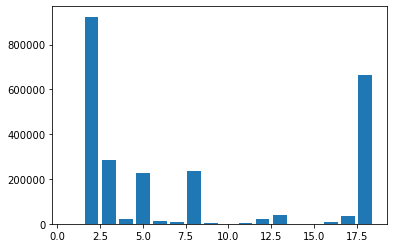

In [92]:
product_categorys = range(1, 19)
nums = ads.groupby(['product_category']).count()['industry']
plt.bar(product_categorys, nums)
plt.show()

* product_category bar(new)

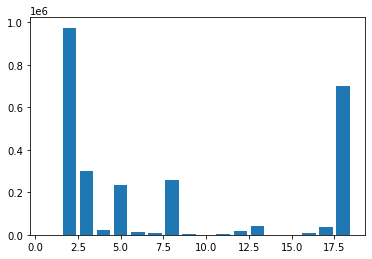

In [27]:
product_categorys = range(1, 19)
nums = ads.groupby(['product_category']).count()['industry']
plt.bar(product_categorys, nums)
plt.show()* product_category bar(old)

* industry bar

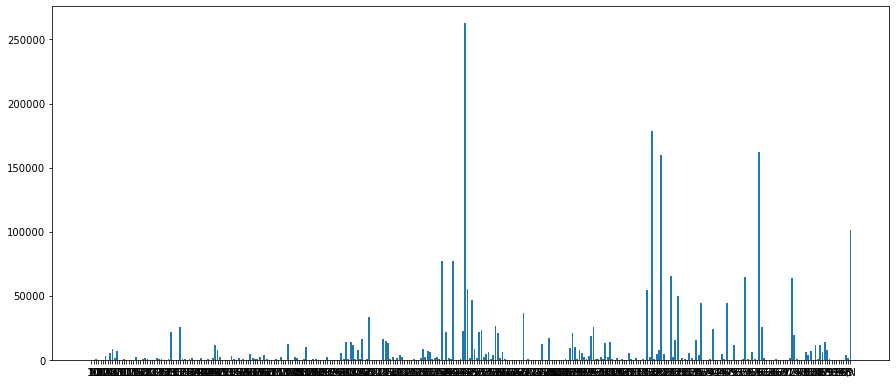

In [105]:
industrys = ads.groupby(['industry']).count()['product_category'].index
nums = ads.groupby(['industry']).count()['product_category']
plt.figure(figsize=(15, 6.5))
plt.bar(industrys, nums)
plt.show()

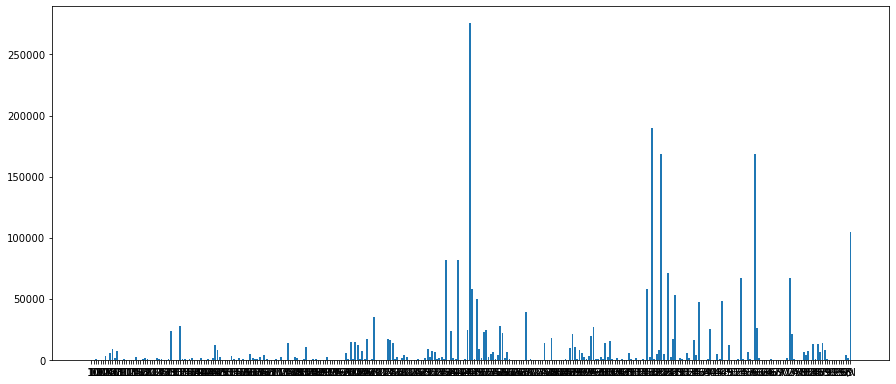

In [28]:
industrys = ads.groupby(['industry']).count()['product_category'].index
nums = ads.groupby(['industry']).count()['product_category']
plt.figure(figsize=(15, 6.5))
plt.bar(industrys, nums)
plt.show()

### click_log.csv

* time bar(old)

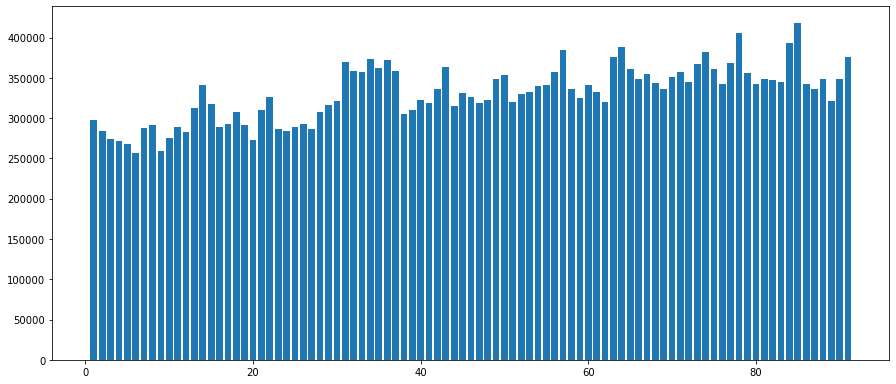

In [110]:
times = log.groupby(['time']).count()['click_times'].index
nums = log.groupby(['time']).count()['click_times']
plt.figure(figsize=(15, 6.5))
plt.bar(times, nums)
plt.show()

* time bar(new)

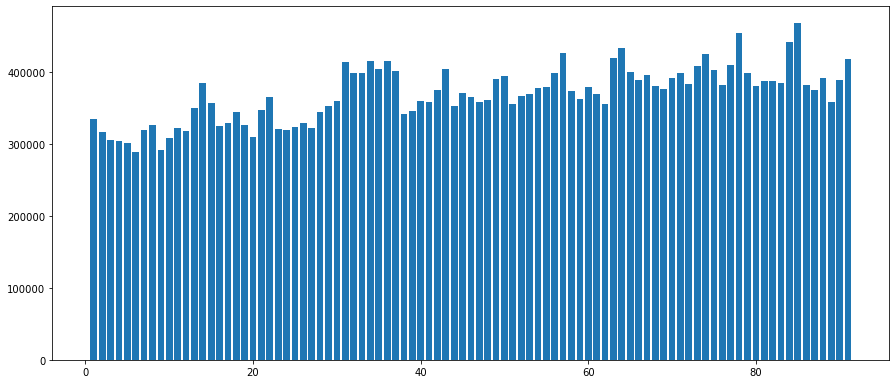

In [31]:
times = log.groupby(['time']).count()['click_times'].index
nums = log.groupby(['time']).count()['click_times']
plt.figure(figsize=(15, 6.5))
plt.bar(times, nums)
plt.show()* time bar

* click_times bar(old)

In [113]:
log.groupby(['click_times']).count()['time']

click_times
1      28426543
2       1507449
3         90356
4         43047
5          7507
6          3512
7          1529
8          1486
9           452
10          270
11          172
12          116
13           76
14           62
15           36
16           34
17           22
18           21
19           10
20           13
21           17
22            5
23            4
24            3
25            2
26            3
27            3
28            1
29            2
30            3
32            3
33            2
34            1
35            1
36            1
37            2
43            1
44            1
50            1
67            1
152           1
Name: time, dtype: int64

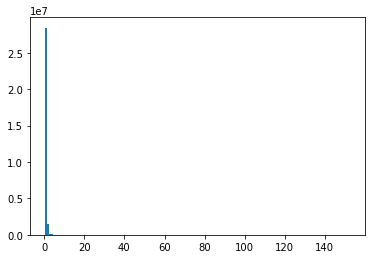

In [112]:
click_times = log.groupby(['click_times']).count()['time'].index
nums = log.groupby(['click_times']).count()['time']
plt.bar(click_times, nums)
plt.show()

* click_times bar(new)

In [53]:
log.groupby(['click_times']).count()['time'].iloc[40:]

click_times
41     7
42     8
43     5
44     1
45     3
46     7
47     6
48     6
49     3
50     3
51     2
52     2
53     4
54     6
55     2
57     2
58     2
59     3
60     1
61     4
65     2
66     2
67     2
69     1
72     3
73     2
76     5
77     2
79     3
80     3
82     1
84     2
87     2
88     1
90     1
94     1
96     1
97     2
103    2
106    1
108    1
113    1
119    1
120    1
121    1
122    1
124    1
127    2
133    1
146    1
158    1
167    1
185    1
Name: time, dtype: int64

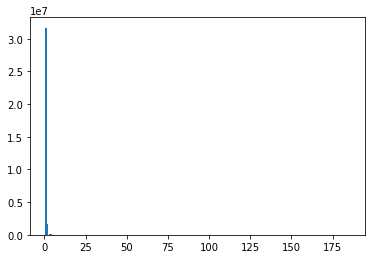

In [33]:
click_times = log.groupby(['click_times']).count()['time'].index
nums = log.groupby(['click_times']).count()['time']
plt.bar(click_times, nums)
plt.show()

### click_log + ad

In [87]:
merged_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33585512 entries, 0 to 33585511
Data columns (total 9 columns):
 #   Column            Dtype
---  ------            -----
 0   time              int64
 1   user_id           int64
 2   creative_id       int64
 3   click_times       int64
 4   ad_id             int64
 5   product_id        int64
 6   product_category  int64
 7   advertiser_id     int64
 8   industry          int64
dtypes: int64(9)
memory usage: 2.5 GB


In [76]:
set(log.groupby(['user_id']).count()['creative_id'])

{2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 1

In [140]:
log.groupby(['user_id']).count()['creative_id'][log.groupby(['user_id']).count()['creative_id'] == 113974]


user_id
3648518    113974
Name: creative_id, dtype: int64

In [169]:
merged_log[merged_log.user_id == 3548147].groupby(['creative_id']).count()['time'].sort_values(ascending=False).iloc[:20]


creative_id
291979     45
304118     35
1145367    32
7400       31
430586     27
13069      25
24333      24
71691      23
39714      22
415805     19
96192      19
133060     18
157148     18
2085566    18
40060      18
670        18
304111     18
70933      17
26284      17
147339     16
Name: time, dtype: int64

In [176]:
merged_log[merged_log.user_id == 3522917].groupby(['creative_id']).count()['time'].sort_values(ascending=False).iloc[:20]


creative_id
7400       42
304118     36
670        31
122388     28
13069      27
40060      27
147339     25
55527      25
39714      24
1145367    24
569079     23
24333      22
391390     20
12236      20
157148     20
96192      20
309573     20
2085566    19
102153     19
6417       18
Name: time, dtype: int64

In [171]:
merged_log[merged_log.user_id == 3206914].groupby(['creative_id']).count()['time'].sort_values(ascending=False).iloc[:20]


creative_id
7400       48
304118     46
13069      43
1145367    42
40060      39
291979     39
39714      37
96192      35
670        35
157148     33
430586     32
133060     31
24333      29
569079     28
782930     28
32571      27
147339     27
421447     26
70933      25
71691      24
Name: time, dtype: int64

In [172]:
merged_log[merged_log.user_id == 3093561].groupby(['creative_id']).count()['time'].sort_values(ascending=False).iloc[:40]


creative_id
304118     58
7400       56
291979     53
1145367    51
13069      47
670        39
430586     39
39714      38
24333      38
32571      36
70933      35
6417       33
96192      32
243181     31
1037290    31
40060      31
292026     30
71691      30
133060     30
9148       29
569079     28
14309      28
147339     28
309573     27
754390     27
960671     26
53083      26
32572      26
114074     26
12838      26
244888     26
57976      25
961938     25
625439     25
262543     25
157148     25
1073278    24
119460     24
391390     24
421447     24
Name: time, dtype: int64

In [173]:
merged_log[merged_log.user_id == 3648518].groupby(['creative_id']).count()['time'].sort_values(ascending=False).iloc[:40]


creative_id
13069      88
7400       83
70933      79
291979     76
304118     74
133060     73
304111     70
754390     68
53083      67
670        67
71691      67
102153     65
55527      65
783522     64
1145367    63
243181     63
214927     63
66299      63
415805     62
37605      62
24333      61
430586     61
782930     61
421447     61
292026     60
309573     59
57976      57
32571      55
157148     55
114074     55
12838      54
147339     53
71692      52
9148       52
1071851    52
15953      51
7823       51
599699     51
9109       50
481926     50
Name: time, dtype: int64